In [137]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


In [244]:
# Importing dataset
df= pd.read_csv("FinalPreprocess.csv")
df=df.dropna()
print("Shape of data=>",df.shape)


Shape of data=> (223260, 6)


In [245]:
df

,index,Unnamed: 0,Name,Time,Store,Comment
0,0,34400,macantonioc,2007-06-25,DigInfo,interesting
1,1,34399,donkeyfly69,2008-02-27,DigInfo,not even seem convenient
2,3,34399,donkeyfly69,2008-02-27,DigInfo,not want pay use shopping cart read recipe
3,4,34399,donkeyfly69,2008-02-27,DigInfo,invade privacy way much just get grocery
4,5,34399,donkeyfly69,2008-02-27,DigInfo,not even deep
...,...,...,...,...,...,...
223255,268126,36995,Mark H.,2020-09-09,Walmart,call refund tell would take day get money back
223256,268127,36995,Mark H.,2020-09-09,Walmart,walmart
223257,268129,37048,Lorna B.,2021-09-09,Walmart,improve site much improve
223258,268130,37048,Lorna B.,2021-09-09,Walmart,far too many grocery available store not avail...


In [246]:
#group column Comment by Store and count total number of comments
df1=df.groupby('Store').count()
df1=df1.reset_index()
df1=df1[['Store','Comment']]
df1.columns=['Store','Total_Comments']
df1


,Store,Total_Comments
0,#NAME?,3
1,Amazon Fresh,21376
2,Amazon Go,65267
3,Casper,59
4,Cust2mate,23
5,DigInfo,39
6,Kroger,7104
7,Octobox,2682
8,Smart Cart,894
9,Sobeys,4104


In [247]:
#delete all rows with the store name '#NAME?'
df_name = df[df.Store == '#NAME?']
df_name

 

,index,Unnamed: 0,Name,Time,Store,Comment
1979,2543,30547,#NAME?,2018-01-27,#NAME?,yvonne probably piss not actually get tampon
2384,3096,30783,#NAME?,2018-01-27,#NAME?,take
2385,3098,30783,#NAME?,2018-01-27,#NAME?,see


In [248]:
#delete this 
df=df.drop(df_name.index)
df

,index,Unnamed: 0,Name,Time,Store,Comment
0,0,34400,macantonioc,2007-06-25,DigInfo,interesting
1,1,34399,donkeyfly69,2008-02-27,DigInfo,not even seem convenient
2,3,34399,donkeyfly69,2008-02-27,DigInfo,not want pay use shopping cart read recipe
3,4,34399,donkeyfly69,2008-02-27,DigInfo,invade privacy way much just get grocery
4,5,34399,donkeyfly69,2008-02-27,DigInfo,not even deep
...,...,...,...,...,...,...
223255,268126,36995,Mark H.,2020-09-09,Walmart,call refund tell would take day get money back
223256,268127,36995,Mark H.,2020-09-09,Walmart,walmart
223257,268129,37048,Lorna B.,2021-09-09,Walmart,improve site much improve
223258,268130,37048,Lorna B.,2021-09-09,Walmart,far too many grocery available store not avail...


In [249]:
#group column Comment by Store and count total number of comments
df1=df.groupby('Store').count()
df1=df1.reset_index()
df1=df1[['Store','Comment']]
df1.columns=['Store','Total_Comments']
df1


,Store,Total_Comments
0,Amazon Fresh,21376
1,Amazon Go,65267
2,Casper,59
3,Cust2mate,23
4,DigInfo,39
5,Kroger,7104
6,Octobox,2682
7,Smart Cart,894
8,Sobeys,4104
9,Walmart,121709


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223257 entries, 0 to 223259
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   index       223257 non-null  int64 
 1   Unnamed: 0  223257 non-null  int64 
 2   Name        223257 non-null  object
 3   Time        223257 non-null  object
 4   Store       223257 non-null  object
 5   Comment     223257 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.9+ MB


In [251]:
#remove fisrt column
df=df.drop(['Unnamed: 0'],axis=1)
df

,index,Name,Time,Store,Comment
0,0,macantonioc,2007-06-25,DigInfo,interesting
1,1,donkeyfly69,2008-02-27,DigInfo,not even seem convenient
2,3,donkeyfly69,2008-02-27,DigInfo,not want pay use shopping cart read recipe
3,4,donkeyfly69,2008-02-27,DigInfo,invade privacy way much just get grocery
4,5,donkeyfly69,2008-02-27,DigInfo,not even deep
...,...,...,...,...,...
223255,268126,Mark H.,2020-09-09,Walmart,call refund tell would take day get money back
223256,268127,Mark H.,2020-09-09,Walmart,walmart
223257,268129,Lorna B.,2021-09-09,Walmart,improve site much improve
223258,268130,Lorna B.,2021-09-09,Walmart,far too many grocery available store not avail...


In [252]:
#remove column index
df=df.drop(['index'],axis=1) 
df

,Name,Time,Store,Comment
0,macantonioc,2007-06-25,DigInfo,interesting
1,donkeyfly69,2008-02-27,DigInfo,not even seem convenient
2,donkeyfly69,2008-02-27,DigInfo,not want pay use shopping cart read recipe
3,donkeyfly69,2008-02-27,DigInfo,invade privacy way much just get grocery
4,donkeyfly69,2008-02-27,DigInfo,not even deep
...,...,...,...,...
223255,Mark H.,2020-09-09,Walmart,call refund tell would take day get money back
223256,Mark H.,2020-09-09,Walmart,walmart
223257,Lorna B.,2021-09-09,Walmart,improve site much improve
223258,Lorna B.,2021-09-09,Walmart,far too many grocery available store not avail...


In [253]:
#change datatype column Time to datetime
df['Time'] = pd.to_datetime(df['Time']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223257 entries, 0 to 223259
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Name     223257 non-null  object        
 1   Time     223257 non-null  datetime64[ns]
 2   Store    223257 non-null  object        
 3   Comment  223257 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 8.5+ MB


In [254]:
#change the format of column Time to dd-mm-yyyy
df['Time'] = df['Time'].dt.strftime('%d-%m-%Y')
df

,Name,Time,Store,Comment
0,macantonioc,25-06-2007,DigInfo,interesting
1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,donkeyfly69,27-02-2008,DigInfo,not even deep
...,...,...,...,...
223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
223256,Mark H.,09-09-2020,Walmart,walmart
223257,Lorna B.,09-09-2021,Walmart,improve site much improve
223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [255]:
#count number of records per year
df2= df['Time'].groupby(df['Time'].str[-4:]).count()
df2


Time
2007        1
2008     1264
2009     3974
2010     4504
2011     3542
2012     6891
2013     2632
2014     3681
2015     7319
2016     6959
2017     9935
2018    49252
2019    22979
2020    27088
2021    38717
2022    34519
Name: Time, dtype: int64

In [126]:
#count the rows of each store by year
df3= df['Time'].groupby([df['Time'].str[-4:],df['Store']]).count()
print(df3)
 

Time  Store       
2007  DigInfo             1
2008  DigInfo             4
      Walmart          1260
2009  DigInfo            13
      Walmart          3961
2010  DigInfo             1
      Walmart          4503
2011  Walmart          3542
2012  DigInfo             1
      Walmart          6890
2013  Kroger              6
      Walmart          2626
2014  Walmart          3681
2015  DigInfo            13
      Kroger              7
      Walmart          7299
2016  Kroger             41
      Walmart          6918
2017  Amazon Go           3
      Kroger             21
      Walmart          9911
2018  Amazon Go       41326
      Kroger             27
      Walmart          7899
2019  Amazon Go        8264
      Casper             15
      DigInfo             1
      Kroger            345
      Sobeys            459
      Walmart         13895
2020  Amazon Fresh     3412
      Amazon Go        6300
      Casper             33
      DigInfo             5
      Kroger             82
 

In [ ]:
#visualize wordcloud for rows if store "walmart" in 2018 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
df_walmart = df[(df['Store'] == 'Walmart') & (df['Time'].str[-4:] == '2018')]
df_walmart
#wordcloud for walmart in 2018
comment_words = ' '
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in df_walmart.Comment:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
 

In [ ]:
#visualize wordcloud for column "Comment" from 2008 to 2019
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
comment_words = ' ' 
for val in df.Comment:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
 
 



In [ ]:
#visualize wordcloud for column "Comment" from 2008 
df3=df[df['Time'].str[-4:]=='2008']
df3
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
comment_words = ' '
for val in df3.Comment:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()
 

In [ ]:
#visualize wordcloud for column "Comment" from 2008 
df3=df[df['Time'].str[-4:]=='2022']
df3
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
comment_words = ' '
for val in df3.Comment:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()
 

In [ ]:
#drop the column which year is 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017
df=df.drop(df[df['Time'].str[-4:]=='2007'].index)
df=df.drop(df[df['Time'].str[-4:]=='2008'].index)
df=df.drop(df[df['Time'].str[-4:]=='2009'].index)
df=df.drop(df[df['Time'].str[-4:]=='2010'].index)
df=df.drop(df[df['Time'].str[-4:]=='2011'].index)
df=df.drop(df[df['Time'].str[-4:]=='2012'].index)
df=df.drop(df[df['Time'].str[-4:]=='2013'].index)
df=df.drop(df[df['Time'].str[-4:]=='2014'].index)
df=df.drop(df[df['Time'].str[-4:]=='2015'].index)
df=df.drop(df[df['Time'].str[-4:]=='2016'].index)
df=df.drop(df[df['Time'].str[-4:]=='2017'].index)
df

In [ ]:
#count walmart in 2018, 2019, 2020, 2021, 2022
df_walmart = df[(df['Store'] == 'Walmart') & (df['Time'].str[-4:] == '2018')]
df_walmart = df[(df['Store'] == 'Walmart') & (df['Time'].str[-4:] == '2019')]
df_walmart = df[(df['Store'] == 'Walmart') & (df['Time'].str[-4:] == '2020')]
df_walmart = df[(df['Store'] == 'Walmart') & (df['Time'].str[-4:] == '2021')]
df_walmart = df[(df['Store'] == 'Walmart') & (df['Time'].str[-4:] == '2022')]
df_walmart
 

In [ ]:
#drop walmart 
df=df.drop(df[df['Store'] == 'Walmart'].index)
df

In [256]:
#Check for null values
df.isnull().sum()

Name       0
Time       0
Store      0
Comment    0
dtype: int64

In [257]:
#Check for duplicates
df.duplicated().sum()

13502

In [258]:
#show duplicate data
df[df.duplicated()] 

,Name,Time,Store,Comment
70,Christopher Ferrell,10-04-2014,Walmart,com
402,SCUBAsabre,08-04-2017,Walmart,com
408,SCUBAsabre,08-04-2017,Walmart,com
421,SCUBAsabre,08-04-2017,Walmart,com
432,SCUBAsabre,08-04-2017,Walmart,com
...,...,...,...,...
222971,Kristen H.,09-04-2017,Walmart,fill order pick door full service
222972,Kristen H.,09-04-2017,Walmart,like website
222973,Kristen H.,09-04-2017,Walmart,like product usually
222974,Kristen H.,09-04-2017,Walmart,not


In [259]:
#drop duplicate data
df.drop_duplicates(inplace=True)
df

,Name,Time,Store,Comment
0,macantonioc,25-06-2007,DigInfo,interesting
1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient
2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe
3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery
4,donkeyfly69,27-02-2008,DigInfo,not even deep
...,...,...,...,...
223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back
223256,Mark H.,09-09-2020,Walmart,walmart
223257,Lorna B.,09-09-2021,Walmart,improve site much improve
223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...


In [260]:
#Check for unique values
df.nunique()

Name        66091
Time         4392
Store          10
Comment    186248
dtype: int64

In [261]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\htmng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [262]:
# Số ký tự 
df ["char_count"] = df ["Comment"]. map (lambda x: len (x))
# Số lượng từ 
df ["word_count"] = df ["Comment"]. map (lambda x: len (x.split ()))
# Đếm số câu 
df ["sent_count"] = df ["Comment"]. map (lambda x: len (sent_tokenize (x)))
# Số chuỗi 
df ["hashtag_count"] = df ["Comment"]. map (lambda x: x.count ("#"))
# Độ dài từ trung bình 
df ["avg_word_len"] = df ["Comment"]. map (lambda x: np.mean ([len (w) for w in str (x) .split ()]))
# Độ dài câu trung bình 
df ["avg_sent_len"] = df ["Comment"]. map (lambda x: np.mean ([len (w.split ()) for w in sent_tokenize (x)]))
df

,Name,Time,Store,Comment,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
0,macantonioc,25-06-2007,DigInfo,interesting,11,1,1,0,11.000000,1.0
1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,24,4,1,0,5.250000,4.0
2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,42,8,1,0,4.375000,8.0
3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,40,7,1,0,4.857143,7.0
4,donkeyfly69,27-02-2008,DigInfo,not even deep,13,3,1,0,3.666667,3.0
...,...,...,...,...,...,...,...,...,...,...
223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,46,9,1,0,4.222222,9.0
223256,Mark H.,09-09-2020,Walmart,walmart,7,1,1,0,7.000000,1.0
223257,Lorna B.,09-09-2021,Walmart,improve site much improve,25,4,1,0,5.500000,4.0
223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,74,11,1,0,5.818182,11.0


In [263]:
df.describe()

,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
count,209755.000000,209755.000000,209755.0,209755.0,209755.000000,209755.000000
mean,39.229768,6.486348,1.0,0.0,5.181711,6.486348
std,35.143835,5.326456,0.0,0.0,2.250183,5.326456
min,2.000000,1.000000,1.0,0.0,2.000000,1.000000
25%,17.000000,3.000000,1.0,0.0,4.500000,3.000000
50%,31.000000,5.000000,1.0,0.0,5.000000,5.000000
75%,52.000000,8.000000,1.0,0.0,5.750000,8.000000
max,2647.000000,222.000000,1.0,0.0,704.000000,222.000000


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


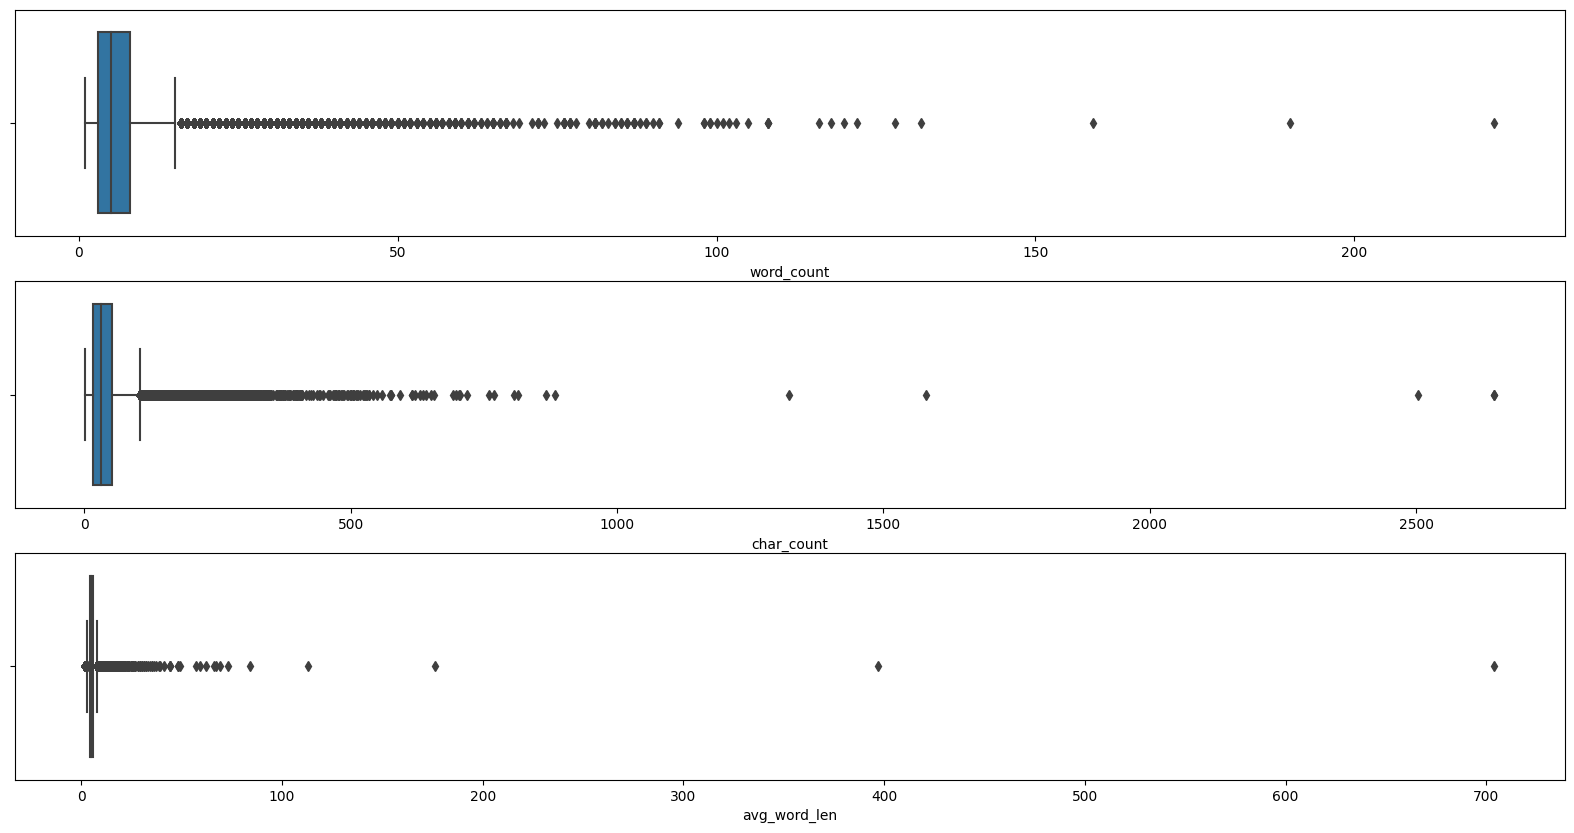

In [264]:
#visualize worod count, char count and avg word len in a figure 
fig, ax = plt.subplots (3, figsize = (20, 10))
sns.boxplot (df ["word_count"], ax = ax [0])
sns.boxplot (df ["char_count"], ax = ax [1])
sns.boxplot (df ["avg_word_len"], ax = ax [2])
plt.show ()


# thực hiện phương pháp IQR để phát hiện và xử lý các ngoại lệ.
Sử dụng IQR, chúng ta có thể làm theo cách tiếp cận dưới đây để thay thế các giá trị ngoại lệ bằng giá trị NULL:

* Tính phần tư thứ nhất và thứ ba (Q1 và Q3).
* Hơn nữa, hãy đánh giá phạm vi liên phần tư, IQR = Q3-Q1 .
* Ước tính giới hạn dưới, giới hạn dưới = Q1 * 1.5
* Ước tính giới hạn trên, giới hạn trên = Q3 * 1.5
* Thay thế các điểm dữ liệu nằm bên ngoài giới hạn dưới và giới hạn trên bằng giá trị NULL .



In [265]:
for x in ['word_count']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = 50
    #max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [266]:
df.isnull().sum()

Name               0
Time               0
Store              0
Comment            0
char_count         0
word_count       177
sent_count         0
hashtag_count      0
avg_word_len       0
avg_sent_len       0
dtype: int64

In [267]:
df1 = df[df.isna().any(axis=1)]
df1

,Name,Time,Store,Comment,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
75,Connie Ernst,10-09-2014,Walmart,walmart use very good come fabric section coul...,507,NaN,1,0,5.195122,82.0
242,Elicia Cruzita Solis,10-06-2016,Walmart,order wooden play set year old son two day lat...,309,NaN,1,0,5.078431,51.0
4230,Von Hassen,27-01-2018,Amazon Go,consider privacy go system specific purpose to...,374,NaN,1,0,5.944444,54.0
8083,Nogghan,28-01-2018,Amazon Go,just want know people give much fuck weather i...,338,NaN,1,0,5.396226,53.0
10197,Filip Westerberg,28-01-2018,Amazon Go,da hecckk linus get rightcan basically go buy ...,314,NaN,1,0,5.057692,52.0
...,...,...,...,...,...,...,...,...,...,...
220919,Pamela B.,26-10-2021,Walmart,lot unnecessary run back forth just get someon...,385,NaN,1,0,5.433333,60.0
221987,trinket t.,15-09-2018,Walmart,say could not send new msg indicate item retur...,309,NaN,1,0,4.849057,53.0
221988,Danielle G.,15-09-2021,Walmart,disrespectful lie walmart employee walmart red...,512,NaN,1,0,5.107143,84.0
221997,Melanie S.,16-09-2014,Walmart,allow price matching store available online cu...,365,NaN,1,0,5.654545,55.0


In [268]:
#count df1 that have store "Amazon Go"
df1 = df1[(df1['Store'] == 'Amazon Go')] 
df1


,Name,Time,Store,Comment,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
4230,Von Hassen,27-01-2018,Amazon Go,consider privacy go system specific purpose to...,374,NaN,1,0,5.944444,54.0
8083,Nogghan,28-01-2018,Amazon Go,just want know people give much fuck weather i...,338,NaN,1,0,5.396226,53.0
10197,Filip Westerberg,28-01-2018,Amazon Go,da hecckk linus get rightcan basically go buy ...,314,NaN,1,0,5.057692,52.0
15674,TheDestroyer32,28-01-2018,Amazon Go,pretty soon within next year go little no low ...,313,NaN,1,0,5.038462,52.0
17817,Zack Politicianzuk,29-01-2018,Amazon Go,video clickbait maximum extent clickbait maxim...,1580,NaN,1,0,7.321053,190.0
22311,Derek Ma,29-01-2018,Amazon Go,not lot benefit mindbenefit smartphone set ala...,441,NaN,1,0,5.597015,67.0
24280,Pan Werv,30-01-2018,Amazon Go,leave crowded prison heroin epidemic us soldie...,494,NaN,1,0,5.971831,71.0
27541,Jhed _Maniac!,02-03-2018,Amazon Go,people highly react something offensive wrong ...,407,NaN,1,0,6.157895,57.0
28216,Scott Tovey,02-05-2018,Amazon Go,revelation third angel follow say loud voice m...,328,NaN,1,0,5.450980,51.0
28590,The Creation May,02-06-2018,Amazon Go,people not lose job beautiful girl love good t...,505,NaN,1,0,4.685393,89.0


In [269]:
df = df.dropna(axis = 0)
df

,Name,Time,Store,Comment,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
0,macantonioc,25-06-2007,DigInfo,interesting,11,1.0,1,0,11.000000,1.0
1,donkeyfly69,27-02-2008,DigInfo,not even seem convenient,24,4.0,1,0,5.250000,4.0
2,donkeyfly69,27-02-2008,DigInfo,not want pay use shopping cart read recipe,42,8.0,1,0,4.375000,8.0
3,donkeyfly69,27-02-2008,DigInfo,invade privacy way much just get grocery,40,7.0,1,0,4.857143,7.0
4,donkeyfly69,27-02-2008,DigInfo,not even deep,13,3.0,1,0,3.666667,3.0
...,...,...,...,...,...,...,...,...,...,...
223255,Mark H.,09-09-2020,Walmart,call refund tell would take day get money back,46,9.0,1,0,4.222222,9.0
223256,Mark H.,09-09-2020,Walmart,walmart,7,1.0,1,0,7.000000,1.0
223257,Lorna B.,09-09-2021,Walmart,improve site much improve,25,4.0,1,0,5.500000,4.0
223258,Lorna B.,09-09-2021,Walmart,far too many grocery available store not avail...,74,11.0,1,0,5.818182,11.0


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


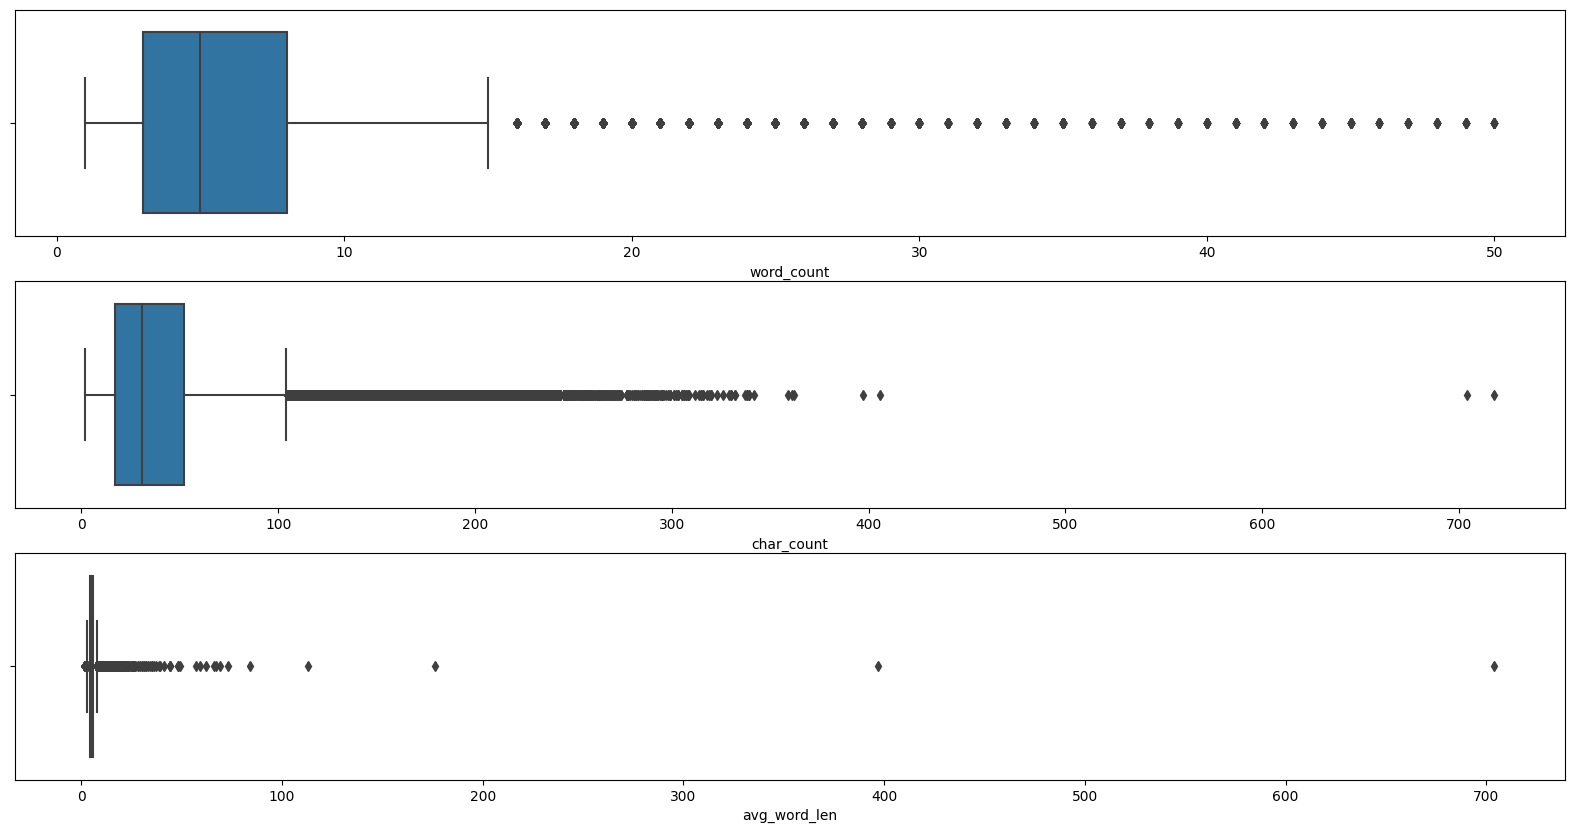

In [270]:
#visualize worod count, char count and avg word len in a figure 
fig, ax = plt.subplots (3, figsize = (20, 10))
sns.boxplot (df ["word_count"], ax = ax [0])
sns.boxplot (df ["char_count"], ax = ax [1])
sns.boxplot (df ["avg_word_len"], ax = ax [2])
plt.show ()


In [271]:
df.to_csv('Data.csv')

In [ ]:
#visualize worod count, char count and avg word len in a figure 
fig, ax = plt.subplots (3, figsize = (20, 10))
sns.distplot (df ["word_count"], ax = ax [0])
sns.distplot (df ["char_count"], ax = ax [1])
sns.distplot (df ["avg_word_len"], ax = ax [2])
plt.show ()
